Rename the notebook as Lastname.Firstname-A1.ipynb for submission.

1. Import required packages.
2. Get a data file with real estate listings for a town of your choice from redfin.com
3. Select only the following columns from the dataset: 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'.

3 pts.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
listings = pd.read_csv('/content/redfin_2023-09-27-14-25-04.csv')

Saving redfin_2023-09-27-14-25-04.csv to redfin_2023-09-27-14-25-04 (1).csv


In [ ]:
listings.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Townhouse,23 Butternut Dr,Wayne,NJ,07470,505000,2.0,2.5,...,Active,NaN,NaN,https://www.redfin.com/NJ/Wayne/23-Butternut-D...,NJMLS,23024158,N,Y,40.993077,-74.249817
1,MLS Listing,NaN,Single Family Residential,15 LENOX Rd,Wayne,NJ,07470,849900,3.0,3.5,...,Active,NaN,NaN,https://www.redfin.com/NJ/Wayne/15-Lenox-Rd-07...,HCMLS,230016230,N,Y,40.945074,-74.263760
2,MLS Listing,NaN,Single Family Residential,61 Hubbardton Rd,Wayne,NJ,07470,949900,4.0,2.5,...,Active,October-1-2023 12:00 PM,October-1-2023 03:00 PM,https://www.redfin.com/NJ/Wayne/61-Hubbardton-...,NJMLS,23029856,N,Y,40.952840,-74.266029
3,MLS Listing,NaN,Single Family Residential,581 Terhune Dr,Wayne,NJ,07470,939000,4.0,3.0,...,Active,NaN,NaN,https://www.redfin.com/NJ/Wayne/581-Terhune-Dr...,NJMLS,23029827,N,Y,41.008428,-74.271049
4,MLS Listing,NaN,Single Family Residential,107 Magnolia Pl,Wayne,NJ,07470,749800,4.0,2.5,...,Active,October-1-2023 01:00 PM,October-1-2023 04:00 PM,https://www.redfin.com/NJ/Wayne/107-Magnolia-P...,NJMLS,23029734,N,Y,40.940114,-74.264081


In [ ]:
listings.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [ ]:
listings=listings[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

4. Check for missing values using a heatmap.
5. Check data distribution by property type using a histogram (bar graph).
6. Exclude records if appropriate.

3 pts.



<Axes: >

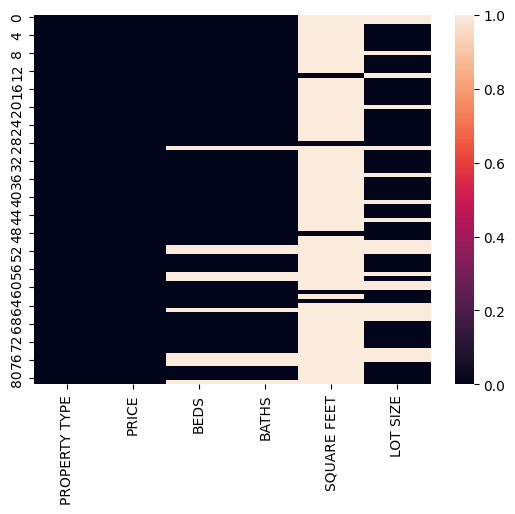

In [20]:
sns.heatmap(listings.isnull(), cbar=True)

<Axes: >

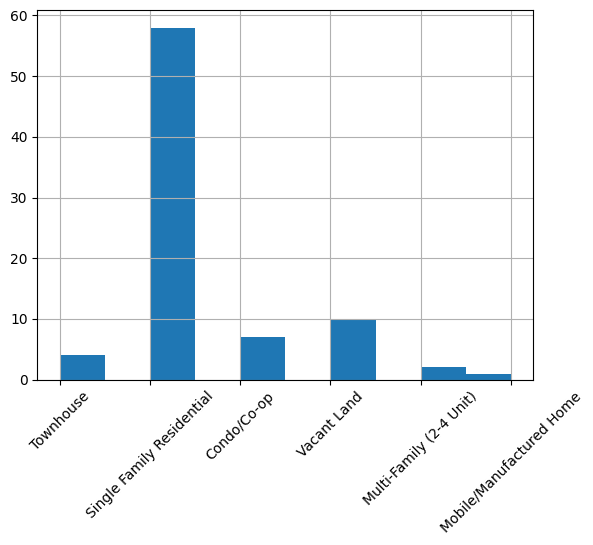

In [22]:
listings['PROPERTY TYPE'].hist(xrot=45.0)

In [23]:
property_types_removed = ['Multi-Family (2-4 Unit)', 'Mobile/Manufactured Home' ]
listings.drop(listings[listings['PROPERTY TYPE'].isin(property_types_removed)].index, inplace=True)

<ipython-input-23-86c411c93667>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings.drop(listings[listings['PROPERTY TYPE'].isin(property_types_removed)].index, inplace=True)


7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

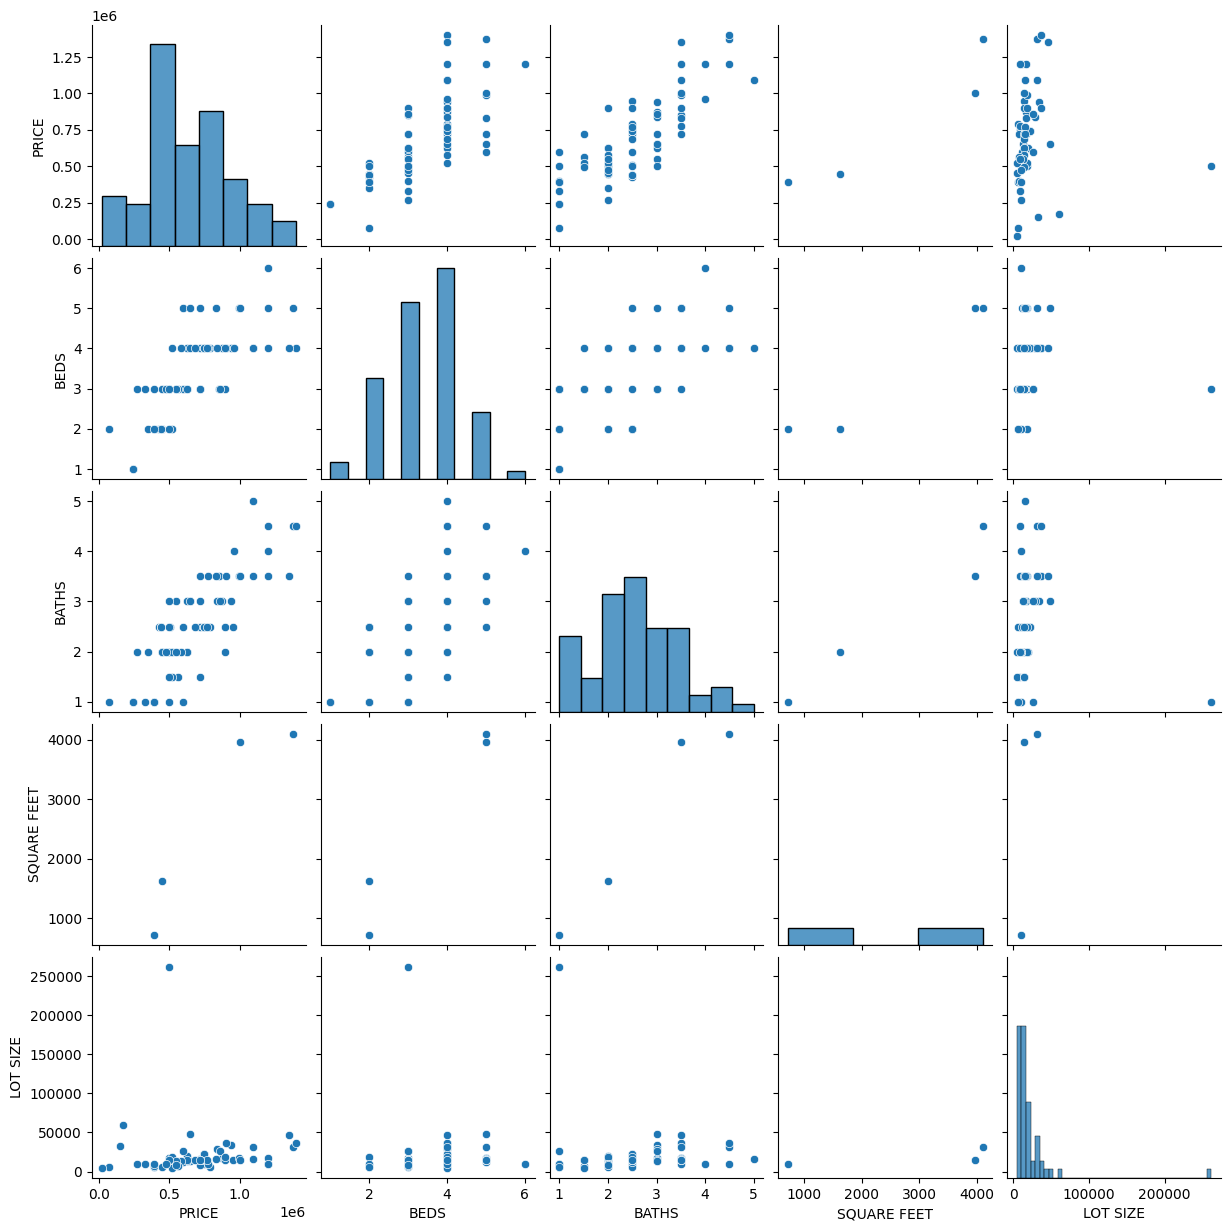

In [25]:
sns.pairplot(listings)

**Q8 answers**

1. There does seem to be a clear linear relationship between the predictors and price. This is most clearly displayed in the relationship between number of beds and price as well as the number of bathrooms and price.
2. The predictors appear not to have homoscedasticity in its variance.
3. There are some outliers that I believe should be excluded such as any properties with a lot size of over 100,000.

9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [26]:
listings.drop(listings[listings['SQUARE FEET'] > 2500 ].index, inplace=True)
listings.drop(listings[listings['LOT SIZE'] > 100000 ].index, inplace=True)

<ipython-input-26-c6fba220609a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings.drop(listings[listings['SQUARE FEET'] > 2500 ].index, inplace=True)
<ipython-input-26-c6fba220609a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings.drop(listings[listings['LOT SIZE'] > 100000 ].index, inplace=True)


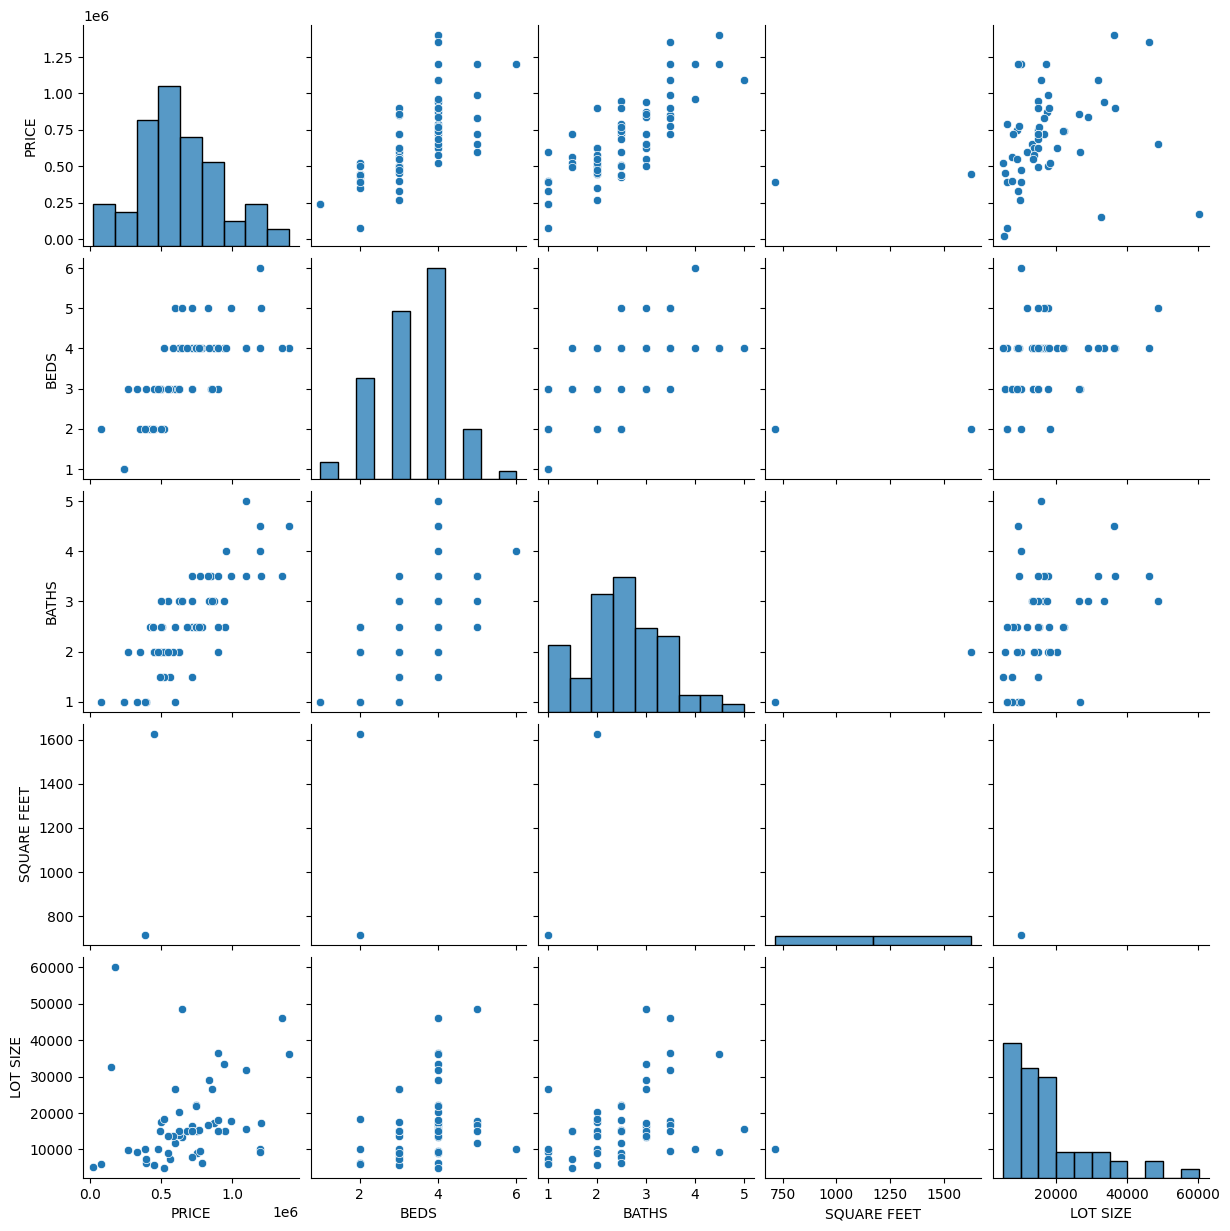

In [30]:
sns.pairplot(listings)

In [29]:
imputed=listings.fillna(listings.mean())
imputed.describe()

<ipython-input-29-10b3f98ee826>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  imputed=listings.fillna(listings.mean())


,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,7.600000e+01,76.000000,76.000000,76.000000,76.000000
mean,6.239697e+05,3.363636,2.507576,1171.000000,17683.418182
std,2.985466e+05,0.961060,0.862139,74.301189,9784.205330
min,2.000000e+04,1.000000,1.000000,716.000000,5009.000000
25%,4.490000e+05,3.000000,2.000000,1171.000000,12926.250000
50%,5.895000e+05,3.363636,2.500000,1171.000000,17662.709091
75%,7.990000e+05,4.000000,3.000000,1171.000000,17683.418182
max,1.399999e+06,6.000000,5.000000,1626.000000,60112.000000


11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict Price.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

7 pts.

In [31]:
predictors = ['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']

In [32]:
X = pd.get_dummies(imputed[predictors], drop_first=True)
y = imputed['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [33]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [34]:
re_prices.intercept_

-208174.99250960664

In [35]:
re_prices.coef_

array([ 7.71782434e+04,  1.87526760e+05,  4.84386684e+01,  2.77116732e+00,
        6.99409443e+04, -6.82737859e+04, -2.98897149e+05])

In [36]:
train_X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse,PROPERTY TYPE_Vacant Land
59,2.0,2.5,1171.0,17683.418182,0,1,0
37,3.0,1.5,1171.0,7492.000000,1,0,0
55,3.0,1.5,1171.0,14985.000000,1,0,0
32,4.0,2.5,1171.0,22215.000000,1,0,0
71,4.0,2.5,1171.0,14985.000000,1,0,0


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [38]:
pred_y = re_prices.predict(valid_X)

In [40]:
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

R2:  0.6365381411136302
MAE:  139290.16151992825
RMSE:  169994.14364075684
Max error:  332398.1747046696


**Q14 Answer**

After looking at the model and the regression model performance evaluation, I think that this model would not be suitable for a practicioner. This is because I believe that the potential error is too high with the max error being over 330,000 dollars  and the mae and rmse being well over 130,000 and 160,000 dollars respectively. I think that this error would be too detrimental for a practicioner to use effectively and reliably to predict the price of houses in Wayne. I think that this is likely due to a less than ideal sample size of the houses in the area and maybe would even out with more data from the surrounding area.